In [82]:

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score,  classification_report, confusion_matrix
import pandas as pd

def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model:   {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import neighbors 

#importing data
df=pd.read_csv('Iris.csv')
df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

for i in range(1,10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance') 
    array = df.values
    X = array[:,1:5]
    Y = array[:,5]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=156)
    clf.fit(X_train, Y_train )
    pred_clf = clf.predict(X_test)
    print(i, clf.score(X_test, Y_test))

clf = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance') 
array = df.values
X = array[:,1:5]
Y = array[:,5]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=156)
clf.fit(X_train, Y_train )
pred_clf = clf.predict(X_test)

#optimal number of neighbors is n=6
print('KNN ', clf)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
#Print confusion matrix
evaluate_model(Y_test,pred_clf)


1 0.94
2 0.94
3 0.96
4 0.96
5 0.96
6 0.98
7 0.96
8 0.96
9 0.98
KNN  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance')
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.98
Accuracy of the model: 0.98

Classification report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        13
         2.0       0.95      1.00      0.97        18
         3.0       1.00      0.95      0.97        19

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Confusion matrix: 
[[13  0  0]
 [ 0 18  0]
 [ 0  1 18]]



C:\Users\Biostar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


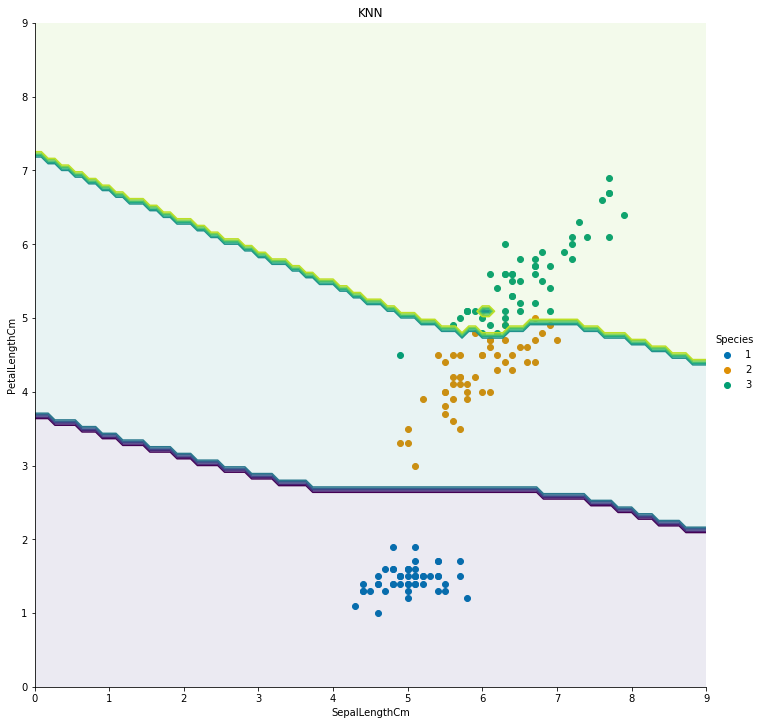

Accuracy of the model: 0.96

Classification report: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        13
         2.0       0.94      0.94      0.94        18
         3.0       0.95      0.95      0.95        19

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50


Confusion matrix: 
[[13  0  0]
 [ 0 17  1]
 [ 0  1 18]]



In [75]:
import seaborn as sns
#Plot decision boundary
clf_2= neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance') 
clf_2.fit(X_train[:,[0,2]], Y_train)


#create meshgrid from 'SepalLengthCm', 'PetalLengthCm'
N = 100
X = np.linspace(0,9, N)
Y = np.linspace(0, 9, N)
X, Y = np.meshgrid(X, Y)
color_list = ['Blues','Greens','Reds']

g = sns.FacetGrid(df, hue='Species',size=10, palette = 'colorblind') .map(plt.scatter, 'SepalLengthCm', 'PetalLengthCm')  .add_legend()
#plotting decision as third axis
z = np.array(  [clf_2.predict( [[x,y]])[0] for x, y in zip(np.ravel(X), np.ravel(Y)) ] )
Z = z.reshape(X.shape)
g.ax.contourf( X, Y, Z, 2, alpha = .1 )
g.ax.contour( X, Y, Z, 10, alpha = 1)


g.ax.set_title('KNN')

plt.show()
evaluate_model(Y_test,pred_clf)

